# Ford GoBike System Data
## by Lama

## Investigation Overview

In this investigation, I wanted to look at the characteristics of members that use a bike-sharing system and not on the trips made on the bikes.

## Dataset Overview

The dataset contained approximately 520000 of Ford's bike sharing rides' details. The variables detailing the trip details were not needed, only the variables that are related to the member's themselves were used, these variables are, member's gender and age (found from the birth year variable) as well as user type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# Drop NaNs from columns that are going to be used
bikes.drop(bikes[(bikes['member_gender'] != 'Male') &  (bikes['member_gender'] != 'Female')].index, inplace = True)
bikes.dropna(subset=['member_birth_year'], inplace = True)

In [4]:
# Create a column for member's age
bikes['member_age'] = 2019 - bikes['member_birth_year']

## Percentage of bike-sharing users' gender

Member's gender in the dataset showed that a large percentage, around 80%, consists of male members, while the rest is female members.

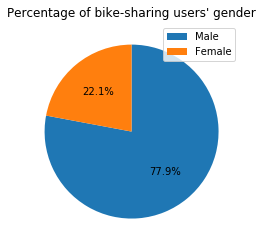

In [5]:
gender_counts = bikes['member_gender'].value_counts()
    
plt.pie(gender_counts, autopct='%.1f%%', startangle = 90, counterclock = False);
plt.legend(gender_counts.index);
plt.title("Percentage of bike-sharing users' gender");

## Member's gender vs. Member's age

The median ages for both member's genders is approximately 38 years-old. The minimum age for both genders is 20 years-old (lower whisker), and the maximum for male's ages is around 65 years-old, while female's is 60 years-old (upper whisker). The points above the whiskers are outliers, which means there isn't a lot of members in that age range.

The majority of the member's ages regardless of their gender is within the age range of 30 to 45 years-old. After that, as age increases, the number of member's using the bike-sharing system start to decrease. The overall distribution of each gender's age seems to be almost similar.

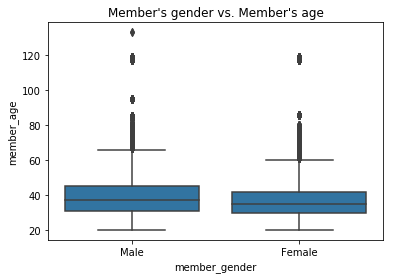

In [6]:
base_color = sb.color_palette()[0]

sb.boxplot(data = bikes, x = 'member_gender', y = 'member_age', color = base_color);
plt.title("Member's gender vs. Member's age");

## Member's age by User type and Member's gender

To visualize the relationship between two categorical variables (member's gender and user type) and one numeric variable (member's age), a heat map was used. It can be seen that there is no relationship between a member's gender, age, and user type. The mean age of members regardless of their gender and user type seem to be around 36 years-old.

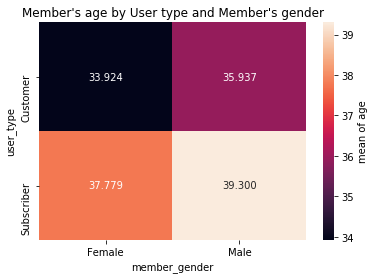

In [7]:
cat_means = bikes.groupby(['member_gender', 'user_type']).mean()['member_age']
cat_means = cat_means.reset_index(name = 'num_var2_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'num_var2_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean of age'});

plt.title("Member's age by User type and Member's gender");